<a href="https://colab.research.google.com/github/st20310132/air-pollution-analysis/blob/main/CMP7005.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
import os


plt.style.use('seaborn-v0_8-whitegrid')  # Updated seaborn style name
sns.set_style("whitegrid")
pd.set_option('display.max_columns', None)


drive.mount('/content/drive')


data_path = '/content/drive/MyDrive/Colab_Notebooks'


sites = {
    'urban': 'Dongsi',
    'suburban': 'Shunyi',
    'rural': 'Dingling',
    'industrial': 'Gucheng'
}

dfs = {}
for area_type, site in sites.items():
    # Look for files containing the site name
    file_pattern = f"*{site}*.csv"
    matching_files = [f for f in os.listdir(data_path) if site in f and f.endswith('.csv')]

    if matching_files:
        file_name = matching_files[0]  # Take the first matching file
        file_path = os.path.join(data_path, file_name)
        dfs[area_type] = pd.read_csv(file_path)
        print(f"Loaded {area_type} site: {site} - Shape: {dfs[area_type].shape}")
    else:
        print(f"No file found for {area_type} site: {site}")

# Add columns to identify the site type
for area_type, df in dfs.items():
    df['site_type'] = area_type
    df['site_name'] = sites[area_type]

# Merge all datasets
if dfs:
    merged_df = pd.concat(dfs.values(), ignore_index=True)
    print("\nMerged Dataset Shape:", merged_df.shape)

    # Display the first few rows
    print("\nFirst 5 rows of the merged dataset:")
    print(merged_df.head())

    # Basic information about the merged dataset
    print("\nDataset Information:")
    merged_df.info()

    # Check for missing values
    print("\nMissing Values Count:")
    print(merged_df.isnull().sum())

    # Save the merged dataset for future use
    merged_file_path = os.path.join(data_path, 'merged_air_quality_data.csv')
    merged_df.to_csv(merged_file_path, index=False)
    print(f"\nMerged dataset saved to: {merged_file_path}")
else:
    print("No datasets were loaded. Please check file names and try again")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Loaded urban site: Dongsi - Shape: (35064, 18)
Loaded suburban site: Shunyi - Shape: (35064, 18)
Loaded rural site: Dingling - Shape: (35064, 18)
Loaded industrial site: Gucheng - Shape: (35064, 18)

Merged Dataset Shape: (140256, 20)

First 5 rows of the merged dataset:
   No  year  month  day  hour  PM2.5  PM10  SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    9.0   9.0  3.0  17.0  300.0  89.0  -0.5   
1   2  2013      3    1     1    4.0   4.0  3.0  16.0  300.0  88.0  -0.7   
2   3  2013      3    1     2    7.0   7.0  NaN  17.0  300.0  60.0  -1.2   
3   4  2013      3    1     3    3.0   3.0  5.0  18.0    NaN   NaN  -1.4   
4   5  2013      3    1     4    3.0   3.0  7.0   NaN  200.0  84.0  -1.9   

     PRES  DEWP  RAIN   wd  WSPM station site_type site_name  
0  1024.5 -21.4   0.0  NNW   5.7  Dongsi     urban    Dongsi  
1  1025.1 -22.1 

DATASET OVERVIEW
Dataset Shape: 140256 rows and 20 columns


Data Types of each column:
No             int64
year           int64
month          int64
day            int64
hour           int64
PM2.5        float64
PM10         float64
SO2          float64
NO2          float64
CO           float64
O3           float64
TEMP         float64
PRES         float64
DEWP         float64
RAIN         float64
wd            object
WSPM         float64
station       object
site_type     object
site_name     object
dtype: object


Columns in the dataset: ['No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station', 'site_type', 'site_name']


Statistical Summary of Numerical Columns:


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,140256.000,140256.000000,140256.000000,140256.000000,140256.000000,137168.000000,138118.000000,137060.000000,135388.000000,131468.000000,136160.000000,140081.000000,140085.000000,140078.000000,140091.000000,140113.000000
mean,17532.500,2014.662560,6.522930,15.729637,11.500000,78.887641,102.952873,14.812565,45.289000,1185.845035,59.655892,13.652527,1010.550217,2.257175,0.062484,1.716392
std,10122.141,1.177201,3.448715,8.800123,6.922211,81.267769,92.174343,20.150253,34.070603,1134.736604,56.203232,11.401465,10.448008,13.792482,0.785582,1.277251
min,1.000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-16.800000,982.400000,-36.000000,0.000000,0.000000
25%,8766.750,2014.000000,4.000000,8.000000,5.750000,19.000000,34.000000,2.000000,18.000000,400.000000,14.000000,3.200000,1002.100000,-9.200000,0.000000,0.900000
50%,17532.500,2015.000000,7.000000,16.000000,11.500000,54.000000,80.000000,7.000000,37.000000,800.000000,49.000000,14.600000,1010.200000,2.700000,0.000000,1.400000
75%,26298.250,2016.000000,10.000000,23.000000,17.250000,110.000000,145.000000,19.000000,65.000000,1500.000000,84.000000,23.400000,1018.800000,14.900000,0.000000,2.200000
max,35064.000,2017.000000,12.000000,31.000000,23.000000,941.000000,999.000000,500.000000,276.000000,10000.000000,1071.000000,41.600000,1042.800000,28.800000,52.100000,12.800000




First 5 rows of the dataset:


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,site_type,site_name
0,1,2013,3,1,0,9.0,9.0,3.0,17.0,300.0,89.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Dongsi,urban,Dongsi
1,2,2013,3,1,1,4.0,4.0,3.0,16.0,300.0,88.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Dongsi,urban,Dongsi
2,3,2013,3,1,2,7.0,7.0,NaN,17.0,300.0,60.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Dongsi,urban,Dongsi
3,4,2013,3,1,3,3.0,3.0,5.0,18.0,NaN,NaN,-1.4,1026.2,-25.5,0.0,N,4.9,Dongsi,urban,Dongsi
4,5,2013,3,1,4,3.0,3.0,7.0,NaN,200.0,84.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Dongsi,urban,Dongsi



Last 5 rows of the dataset:


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,site_type,site_name
140251,35060,2017,2,28,19,14.0,58.0,4.0,19.0,500.0,56.0,12.8,1009.9,-17.0,0.0,NNW,3.1,Gucheng,industrial,Gucheng
140252,35061,2017,2,28,20,27.0,83.0,6.0,60.0,700.0,26.0,11.1,1010.4,-15.5,0.0,NW,1.9,Gucheng,industrial,Gucheng
140253,35062,2017,2,28,21,22.0,37.0,7.0,52.0,600.0,27.0,10.5,1010.8,-15.9,0.0,N,2.3,Gucheng,industrial,Gucheng
140254,35063,2017,2,28,22,9.0,23.0,3.0,13.0,400.0,57.0,8.9,1010.9,-14.9,0.0,NE,1.6,Gucheng,industrial,Gucheng
140255,35064,2017,2,28,23,12.0,48.0,5.0,48.0,600.0,28.0,6.2,1010.5,-13.4,0.0,NNE,0.7,Gucheng,industrial,Gucheng




Memory Usage: 50.63 MB


MISSING VALUES ANALYSIS
Missing Values Information:


,Column,Missing Values,Percentage (%)
0,CO,8788,6.265686
1,NO2,4868,3.470796
2,O3,4096,2.920374
3,SO2,3196,2.278690
4,PM2.5,3088,2.201688
5,PM10,2138,1.524355
6,wd,860,0.613164
7,DEWP,178,0.126911
8,TEMP,175,0.124772
9,PRES,171,0.121920


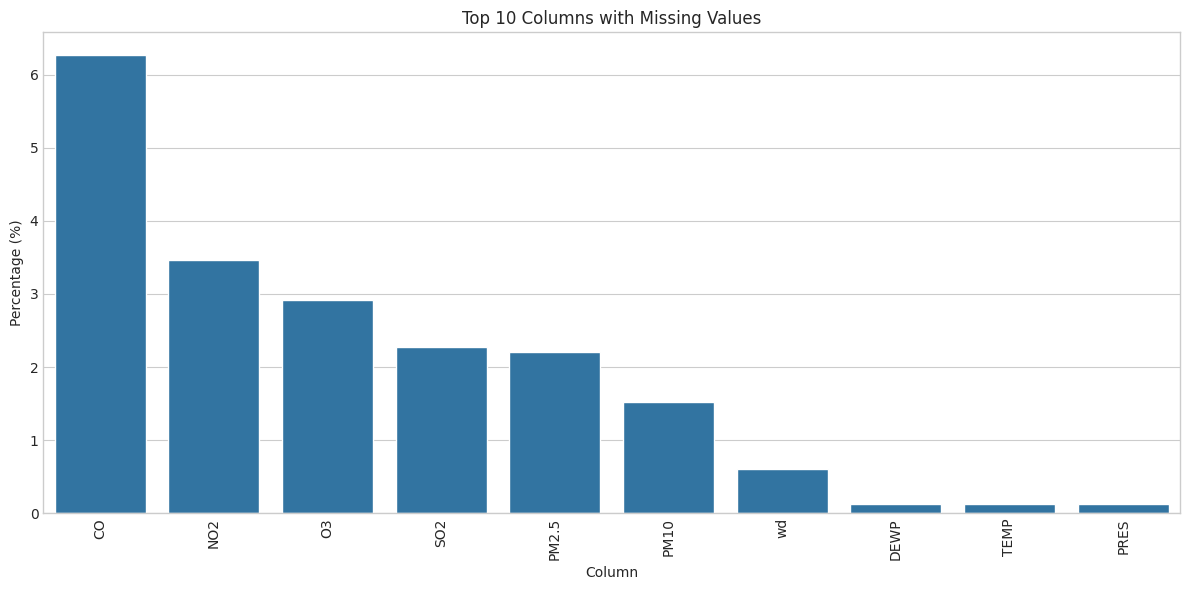



DATA DISTRIBUTION
Value counts for wd:
wd
N      13468
NE     11731
NW     11508
NNE    10989
NNW     9739
E       8751
ENE     8467
WNW     8348
ESE     8222
S       8203
SSE     7771
SE      7710
SSW     7427
SW      6327
W       5904
WSW     4831
Name: count, dtype: int64




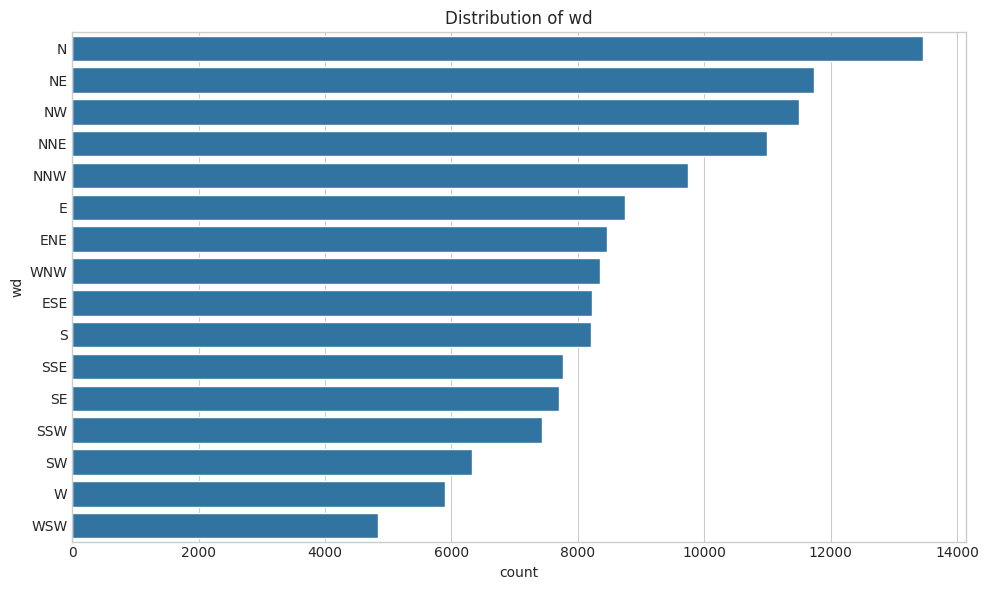

Value counts for station:
station
Dongsi      35064
Shunyi      35064
Dingling    35064
Gucheng     35064
Name: count, dtype: int64




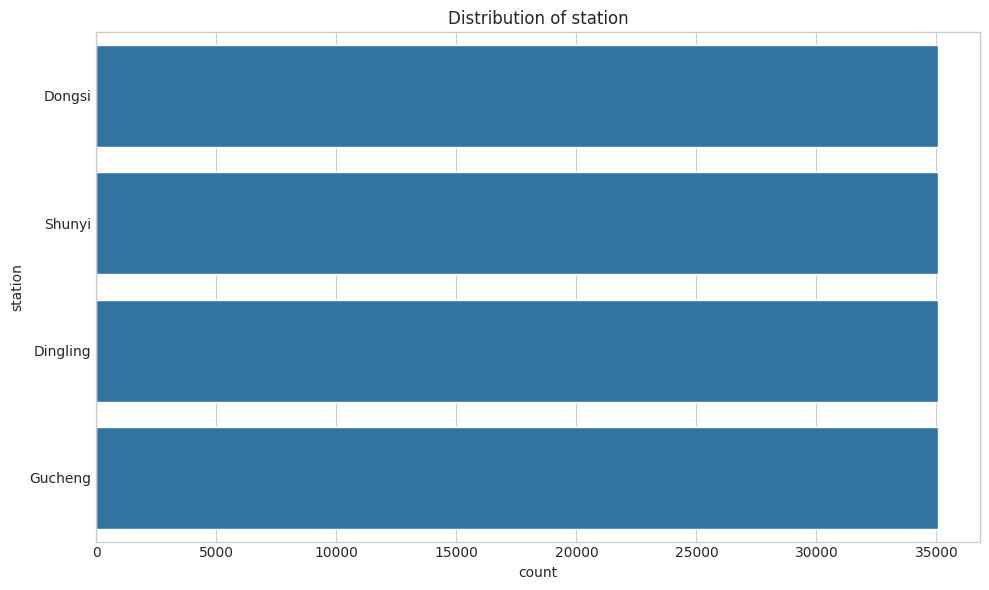

Value counts for site_type:
site_type
urban         35064
suburban      35064
rural         35064
industrial    35064
Name: count, dtype: int64




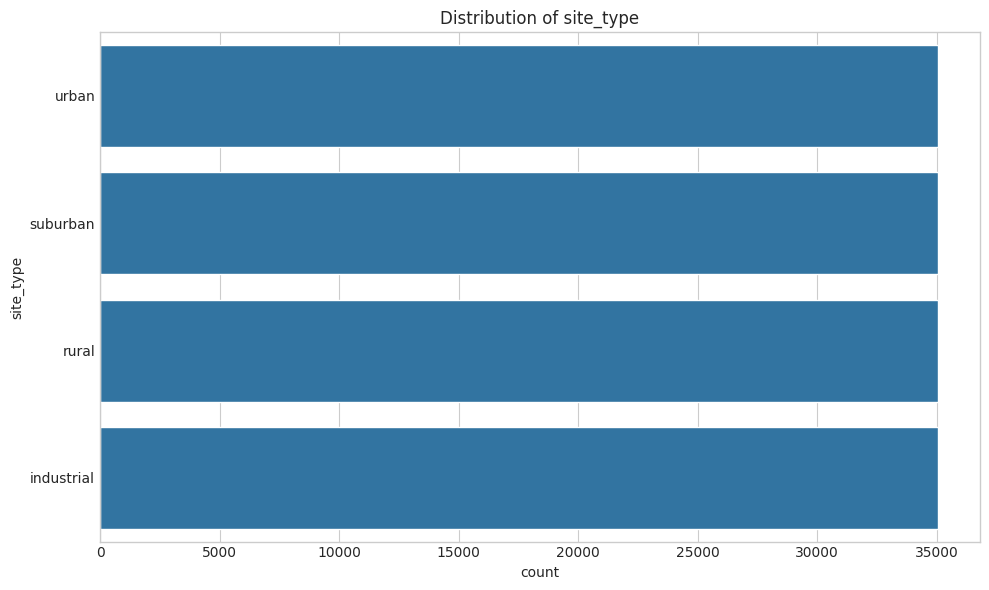

...and 1 more categorical columns
Distribution of Pollutants:


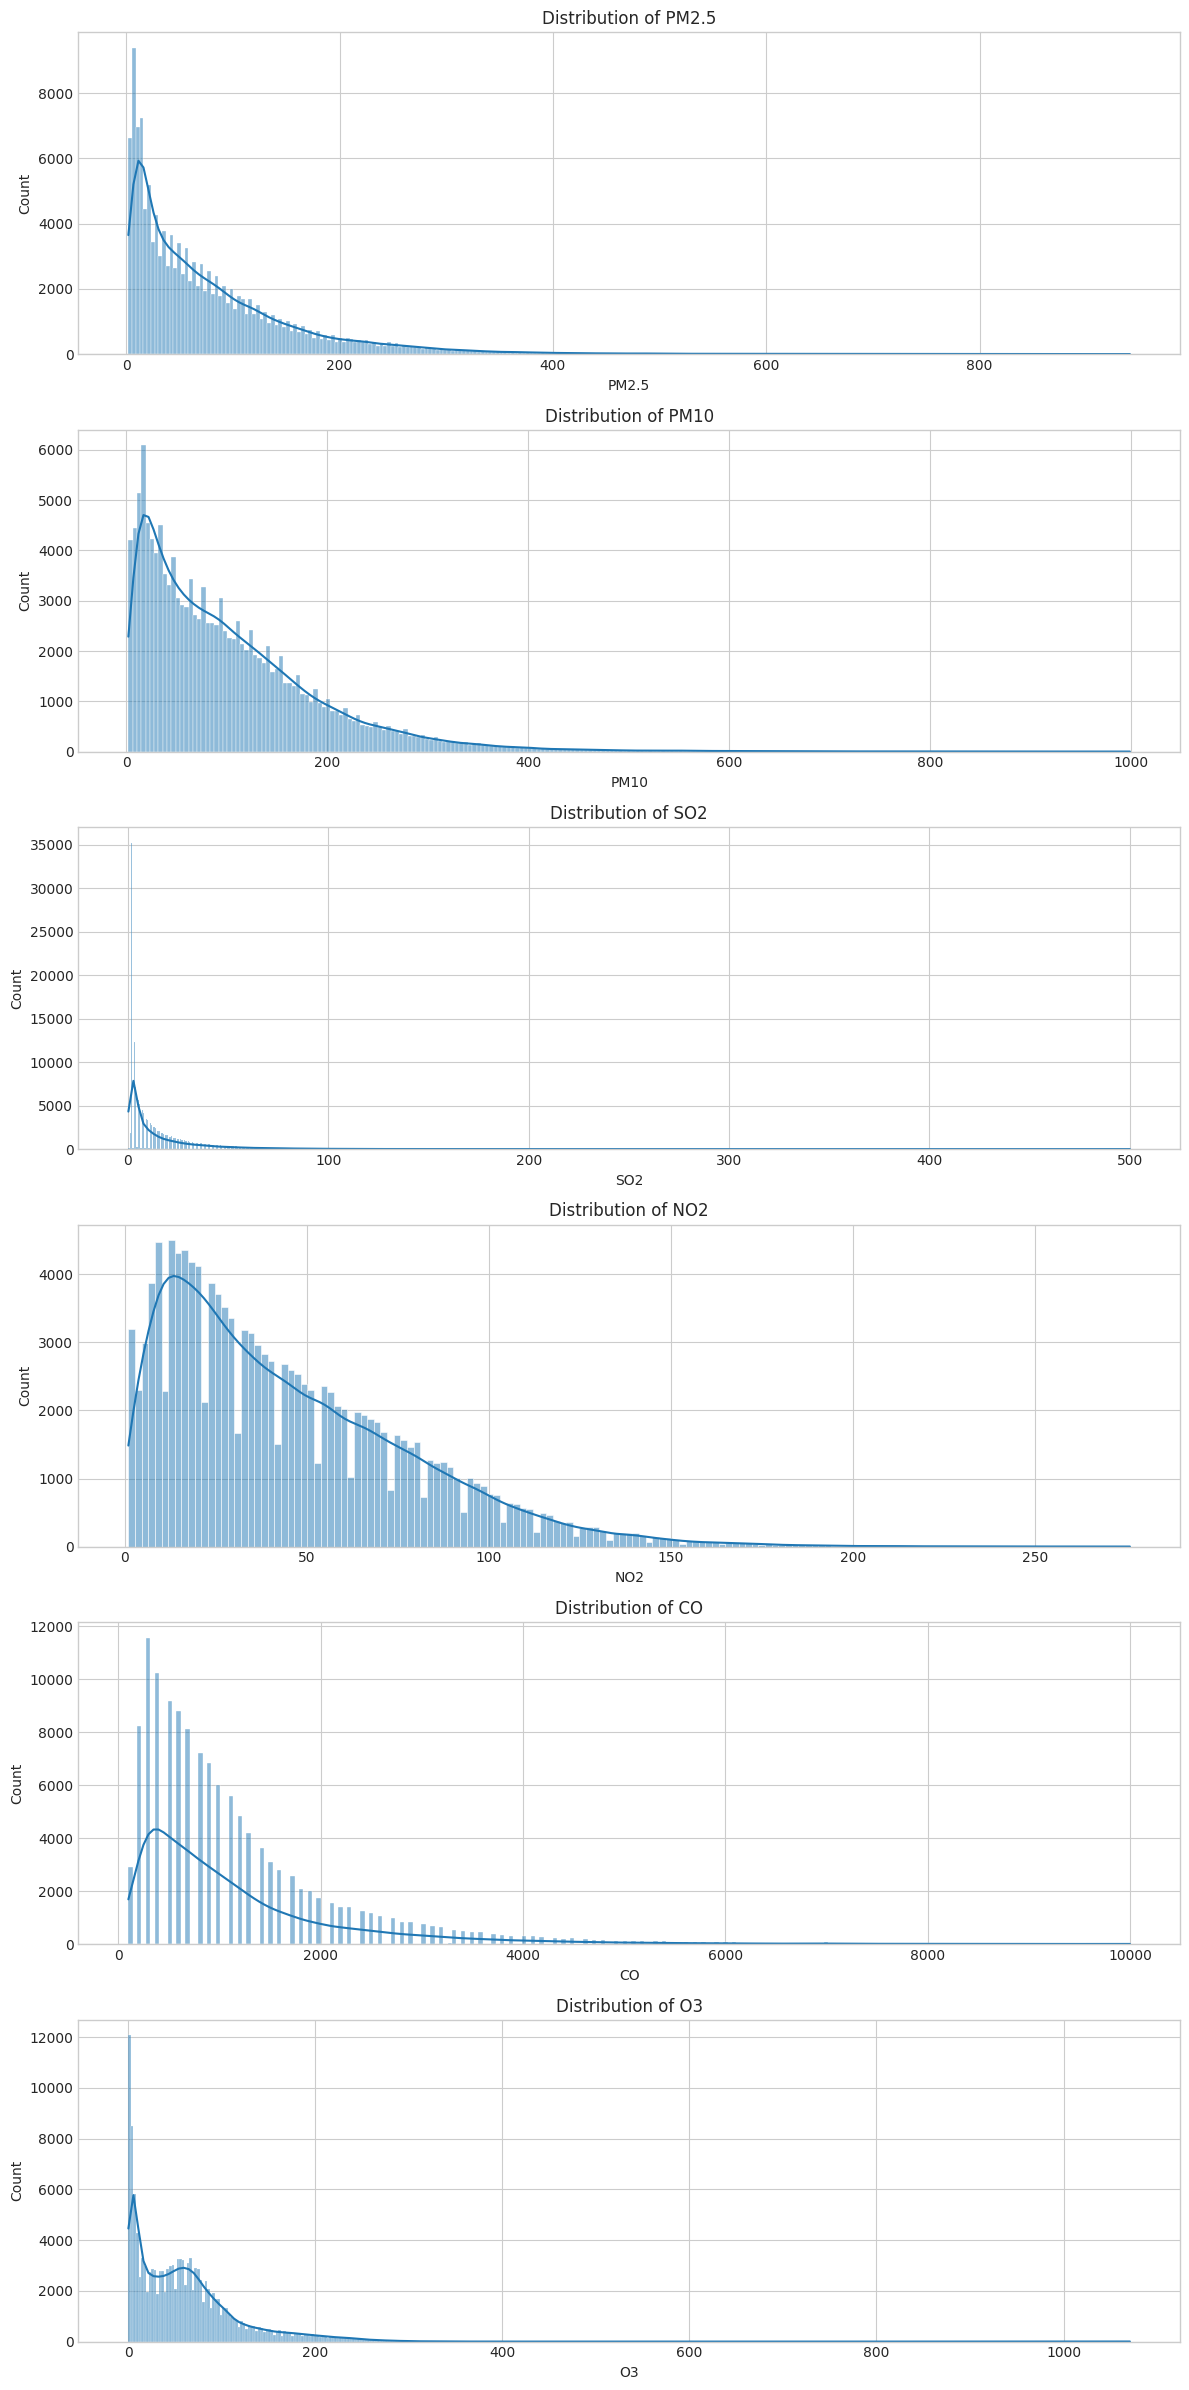



Distribution of Other Numerical Variables:


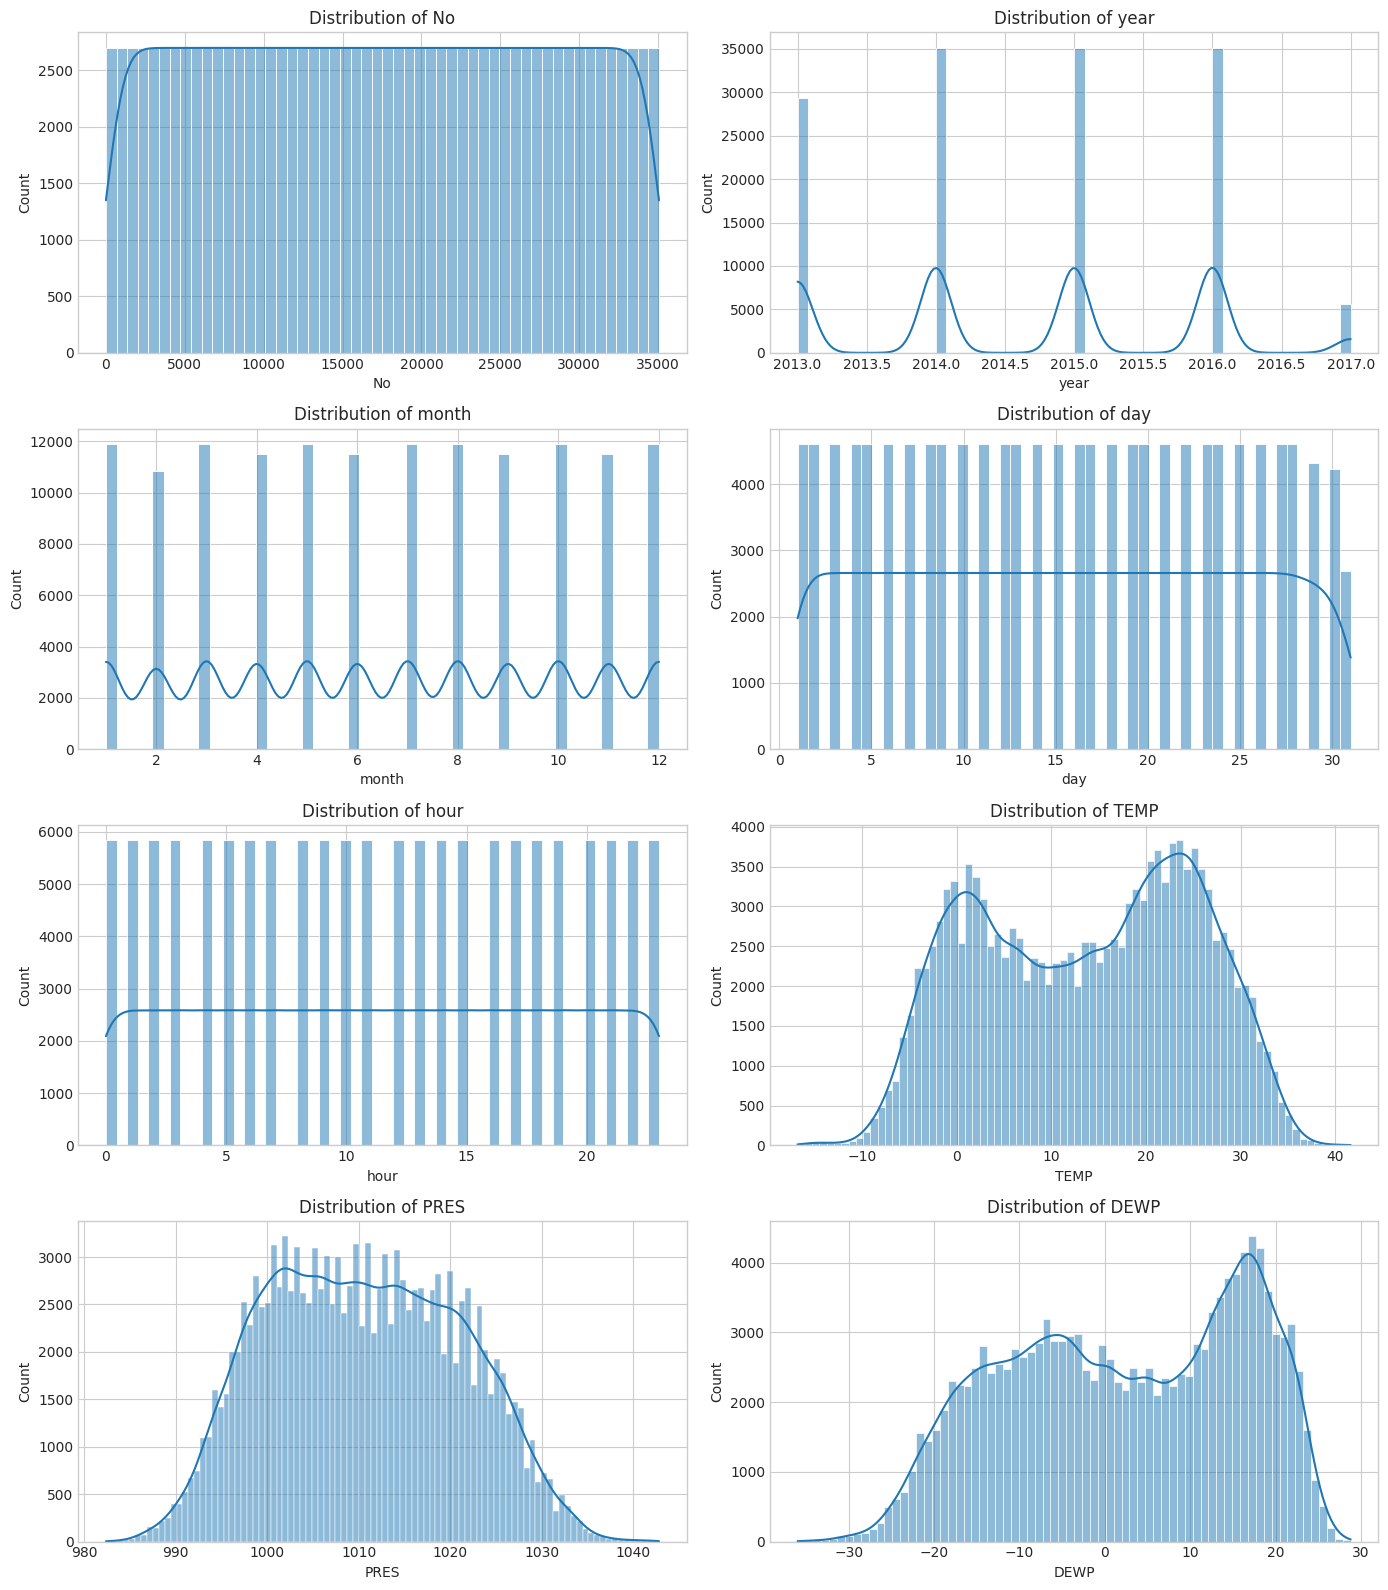



Correlation Analysis:
Correlation Matrix:


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
No,1.00,0.97,0.04,0.02,0.00,-0.01,-0.02,-0.19,-0.03,0.02,-0.06,-0.13,0.17,-0.09,0.01,0.07
year,0.97,1.00,-0.20,-0.01,-0.00,-0.01,-0.01,-0.14,-0.05,0.01,-0.03,-0.16,0.17,-0.16,0.00,0.11
month,0.04,-0.20,1.00,0.01,-0.00,-0.00,-0.03,-0.20,0.05,0.04,-0.12,0.13,-0.02,0.26,0.02,-0.14
day,0.02,-0.01,0.01,1.00,0.00,0.00,0.02,-0.00,0.01,-0.02,0.00,0.01,0.02,0.02,-0.00,-0.01
hour,0.00,-0.00,-0.00,0.00,1.00,0.02,0.07,0.04,0.02,-0.01,0.28,0.14,-0.04,-0.01,0.01,0.13
PM2.5,-0.01,-0.01,-0.00,0.00,0.02,1.00,0.88,0.49,0.67,0.79,-0.15,-0.12,0.01,0.12,-0.01,-0.27
PM10,-0.02,-0.01,-0.03,0.02,0.07,0.88,1.00,0.46,0.67,0.69,-0.11,-0.08,-0.03,0.08,-0.03,-0.19
SO2,-0.19,-0.14,-0.20,-0.00,0.04,0.49,0.46,1.00,0.52,0.56,-0.18,-0.34,0.24,-0.27,-0.04,-0.12
NO2,-0.03,-0.05,0.05,0.01,0.02,0.67,0.67,0.52,1.00,0.72,-0.45,-0.26,0.15,-0.01,-0.04,-0.41
CO,0.02,0.01,0.04,-0.02,-0.01,0.79,0.69,0.56,0.72,1.00,-0.32,-0.32,0.19,-0.05,-0.01,-0.30


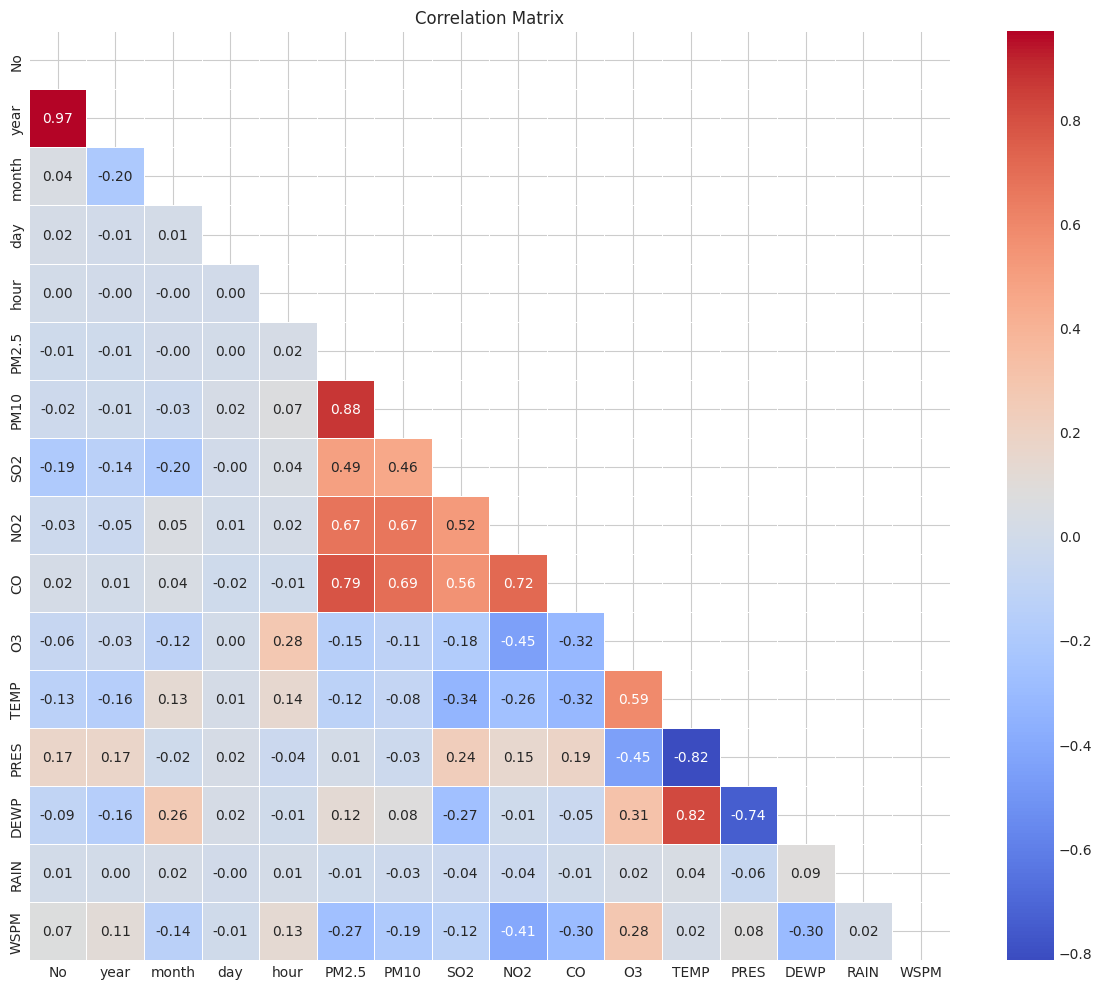



Top 10 Strongest Correlations:


year   No       0.969533
No     year     0.969533
PM10   PM2.5    0.878220
PM2.5  PM10     0.878220
DEWP   TEMP     0.821482
TEMP   DEWP     0.821482
PM2.5  CO       0.788089
CO     PM2.5    0.788089
       NO2      0.717328
NO2    CO       0.717328
dtype: float64



Analyzing temporal patterns using year
Date Range: 1970-01-01 00:00:00.000002013 to 1970-01-01 00:00:00.000002017
Total Time Span: 0 days
Could not convert year to datetime format. Error: Can only use .dt accessor with datetimelike values
SUMMARY OF FINDINGS
1. Dataset contains 140256 observations of 20 variables.
2. The dataset has data from 4 different sites categorized as urban, suburban, rural, industrial.
3. Missing data is present. The column 'CO' has the most missing values (6.27%).
4. Pollutant statistics:
   - PM2.5: Average 78.89, Maximum 941.00
   - PM10: Average 102.95, Maximum 999.00
   - SO2: Average 14.81, Maximum 500.00
   - NO2: Average 45.29, Maximum 276.00
   - CO: Average 1185.85, Maximum 10000.00
   - O3: Average 59.66, Maximum 1071.00
5. The urban site type shows the highest average PM2.5 levels (86.19).
6. The strongest correlation is between year and No (r=0.97).


In [2]:
from IPython.display import display

# Load the merged dataset
merged_file_path = '/content/drive/MyDrive/Colab_Notebooks/merged_air_quality_data.csv'
df = pd.read_csv(merged_file_path)

# ------------- Basic Dataset Information -------------
print("="*80)
print("DATASET OVERVIEW")
print("="*80)

# Dataset Dimensions
print(f"Dataset Shape: {df.shape[0]} rows and {df.shape[1]} columns")
print("\n")

# Data Types Information
print("Data Types of each column:")
print(df.dtypes)
print("\n")

# Column Names
print(f"Columns in the dataset: {df.columns.tolist()}")
print("\n")

# Basic Statistical Summary
print("Statistical Summary of Numerical Columns:")
display(df.describe())
print("\n")

# First and Last Rows
print("First 5 rows of the dataset:")
display(df.head())
print("\nLast 5 rows of the dataset:")
display(df.tail())
print("\n")

# Memory Usage
memory_usage = df.memory_usage(deep=True).sum() / (1024 * 1024)  # Convert to MB
print(f"Memory Usage: {memory_usage:.2f} MB")
print("\n")

# ------------- Missing Values Analysis -------------
print("="*80)
print("MISSING VALUES ANALYSIS")
print("="*80)

# Count of Missing Values
missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_df = pd.DataFrame({
    'Column': missing_values.index,
    'Missing Values': missing_values.values,
    'Percentage (%)': missing_percentage.values
})
missing_df = missing_df.sort_values('Missing Values', ascending=False).reset_index(drop=True)
print("Missing Values Information:")
display(missing_df)
print("\n")

# Visualize Missing Values (for columns with missing values)
missing_columns = missing_df[missing_df['Missing Values'] > 0]
if not missing_columns.empty:
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Column', y='Percentage (%)', data=missing_columns.head(10))
    plt.title('Top 10 Columns with Missing Values')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()
else:
    print("No missing values found in the dataset.")
print("\n")

# ------------- Data Distribution -------------
print("="*80)
print("DATA DISTRIBUTION")
print("="*80)

# Distribution of Categorical Variables
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

for col in categorical_cols:
    # Print value counts
    print(f"Value counts for {col}:")
    value_counts = df[col].value_counts()
    print(value_counts)
    print("\n")

    # Plot distribution
    plt.figure(figsize=(10, 6))
    sns.countplot(y=col, data=df, order=value_counts.index)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()

    # Only show the first 3 categorical columns to avoid too many plots
    if categorical_cols.index(col) >= 2:
        print(f"...and {len(categorical_cols) - 3} more categorical columns")
        break

# Distribution of Numerical Variables
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Focus on pollutants first if they exist
pollutant_cols = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']
pollutants_present = [col for col in pollutant_cols if col in numerical_cols]

if pollutants_present:
    print("Distribution of Pollutants:")
    fig, axes = plt.subplots(len(pollutants_present), 1, figsize=(12, 4*len(pollutants_present)))
    if len(pollutants_present) == 1:
        axes = [axes]  # Ensure axes is iterable even with one subplot

    for i, pollutant in enumerate(pollutants_present):
        sns.histplot(df[pollutant].dropna(), kde=True, ax=axes[i])
        axes[i].set_title(f'Distribution of {pollutant}')
        axes[i].set_xlabel(pollutant)

    plt.tight_layout()
    plt.show()
    print("\n")

# Additional numerical columns (non-pollutants)
other_numerical = [col for col in numerical_cols if col not in pollutants_present]
if other_numerical:
    print("Distribution of Other Numerical Variables:")

    # Display up to 8 other numerical columns in a grid
    display_cols = other_numerical[:min(8, len(other_numerical))]
    rows = (len(display_cols) + 1) // 2  # 2 columns per row

    fig, axes = plt.subplots(rows, 2, figsize=(14, 4*rows))
    axes = axes.flatten() if rows > 1 else [axes]

    for i, col in enumerate(display_cols):
        sns.histplot(df[col].dropna(), kde=True, ax=axes[i])
        axes[i].set_title(f'Distribution of {col}')
        axes[i].set_xlabel(col)

    # Hide any unused subplots
    for j in range(len(display_cols), len(axes)):
        if len(axes) > len(display_cols):
            axes[j].axis('off')

    plt.tight_layout()
    plt.show()
    print("\n")

# Correlation Analysis (for numerical columns)
if len(numerical_cols) > 1:
    print("Correlation Analysis:")
    corr_matrix = df[numerical_cols].corr()

    # Display correlation matrix
    print("Correlation Matrix:")
    display(corr_matrix.round(2))
    print("\n")

    # Visualize correlation matrix
    plt.figure(figsize=(12, 10))
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))  # Create a mask for the upper triangle
    sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title('Correlation Matrix')
    plt.tight_layout()
    plt.show()
    print("\n")

    # Find strongest correlations
    corrs = corr_matrix.unstack().sort_values(ascending=False)
    # Remove self-correlations (value = 1.0)
    corrs = corrs[corrs < 1.0]

    print("Top 10 Strongest Correlations:")
    display(corrs.head(10))
    print("\n")

# Temporal patterns
date_cols = [col for col in df.columns if any(time_kw in col.lower() for time_kw in ['date', 'time', 'year'])]
if date_cols:
    date_col = date_cols[0]  # Use the first date column found
    print(f"Analyzing temporal patterns using {date_col}")

    # Convert to datetime if it's not already
    if df[date_col].dtype != 'datetime64[ns]':
        try:
            df[date_col] = pd.to_datetime(df[date_col])

            # Check the date range
            min_date = df[date_col].min()
            max_date = df[date_col].max()
            print(f"Date Range: {min_date} to {max_date}")
            print(f"Total Time Span: {(max_date - min_date).days} days")

            # Add year, month columns for time analysis
            df['year'] = df[date_col].dt.year
            df['month'] = df[date_col].dt.month

            # Plot time trends for a pollutant (e.g., PM2.5)
            if 'PM2.5' in df.columns:
                plt.figure(figsize=(15, 6))
                monthly_data = df.groupby([df[date_col].dt.year, df[date_col].dt.month])['PM2.5'].mean().reset_index()
                monthly_data['date'] = pd.to_datetime(monthly_data[[date_col + '.dt.year', date_col + '.dt.month']].rename(
                    columns={date_col + '.dt.year': 'year', date_col + '.dt.month': 'month'}).assign(day=1))

                plt.plot(monthly_data['date'], monthly_data['PM2.5'])
                plt.title('Average PM2.5 Levels Over Time')
                plt.xlabel('Date')
                plt.ylabel('PM2.5 Level')
                plt.grid(True)
                plt.tight_layout()
                plt.show()
        except Exception as e:
            print(f"Could not convert {date_col} to datetime format. Error: {e}")

# ------------- Summary of Findings -------------
print("="*80)
print("SUMMARY OF FINDINGS")
print("="*80)
print("1. Dataset contains {rows} observations of {cols} variables.".format(
    rows=df.shape[0], cols=df.shape[1]))

if 'site_name' in df.columns:
    print("2. The dataset has data from {n} different sites categorized as {types}.".format(
        n=df['site_name'].nunique(),
        types=', '.join(df['site_type'].unique()) if 'site_type' in df.columns else "various types"
    ))

# Check if there are missing values
if missing_df['Missing Values'].sum() > 0:
    top_missing = missing_df.iloc[0]['Column']
    top_missing_pct = missing_df.iloc[0]['Percentage (%)']
    print(f"3. Missing data is present. The column '{top_missing}' has the most missing values ({top_missing_pct:.2f}%).")
else:
    print("3. No missing values were found in the dataset.")

# Brief comment on pollutant levels
if pollutants_present:
    print("4. Pollutant statistics:")
    for pollutant in pollutants_present:
        avg_val = df[pollutant].mean()
        max_val = df[pollutant].max()
        print(f"   - {pollutant}: Average {avg_val:.2f}, Maximum {max_val:.2f}")

# Comparison between sites if possible
if 'site_type' in df.columns and pollutants_present:
    main_pollutant = pollutants_present[0]  # Use the first pollutant for comparison
    site_comparison = df.groupby('site_type')[main_pollutant].mean().to_dict()
    highest_site = max(site_comparison, key=site_comparison.get)
    print(f"5. The {highest_site} site type shows the highest average {main_pollutant} levels ({site_comparison[highest_site]:.2f}).")

# Comment on correlations if analyzed
if len(numerical_cols) > 1:
    top_corr_pair = corrs.index[0]
    top_corr_val = corrs.iloc[0]
    print(f"6. The strongest correlation is between {top_corr_pair[0]} and {top_corr_pair[1]} (r={top_corr_val:.2f}).")

# Temporal insights if date data is available
if date_cols and 'year' in df.columns and any(p in df.columns for p in pollutants_present):
    pollutant = next(p for p in pollutants_present if p in df.columns)
    yearly_avg = df.groupby('year')[pollutant].mean()
    if len(yearly_avg) > 1:
        trend = "increasing" if yearly_avg.iloc[-1] > yearly_avg.iloc[0] else "decreasing"
        print(f"7. {pollutant} levels show a {trend} trend over the analyzed time period.")

In [3]:
from sklearn.impute import KNNImputer
from datetime import datetime, timedelta

# Load the merged dataset
# Replace with your actual path
merged_file_path = '/content/drive/MyDrive/Colab_Notebooks/merged_air_quality_data.csv'
df = pd.read_csv(merged_file_path)

# Make a copy of the original data for comparison
df_original = df.copy()

print("Original dataset shape:", df.shape)

# --------- Check and Handle Duplicates ---------
print("\n=== CHECKING FOR DUPLICATE ENTRIES ===")
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

if duplicates > 0:
    df = df.drop_duplicates()
    print(f"Duplicates removed. New shape: {df.shape}")

# --------- Date/Time Processing ---------
print("\n=== DATE/TIME PROCESSING ===")
# Check if there's a date column - common names for date columns in such datasets
date_cols = [col for col in df.columns if any(time_kw in col.lower() for time_kw in ['date', 'time', 'year'])]

if date_cols:
    date_col = date_cols[0]  # Use the first identified date column
    print(f"Found date column: {date_col}")

    # Convert to datetime
    try:
        df[date_col] = pd.to_datetime(df[date_col])

        # Add useful time-based features
        df['year'] = df[date_col].dt.year
        df['month'] = df[date_col].dt.month
        df['day'] = df[date_col].dt.day
        df['day_of_week'] = df[date_col].dt.dayofweek
        df['is_weekend'] = df['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)

        # Add season (Northern Hemisphere)
        def get_season(month):
            if month in [12, 1, 2]:
                return 'Winter'
            elif month in [3, 4, 5]:
                return 'Spring'
            elif month in [6, 7, 8]:
                return 'Summer'
            else:
                return 'Fall'

        df['season'] = df['month'].apply(get_season)
        print("Added time-based features: year, month, day, day_of_week, is_weekend, season")
    except Exception as e:
        print(f"Error converting {date_col} to datetime: {e}")
else:
    print("No date column identified in the dataset.")

# --------- Handle Missing Values ---------
print("\n=== HANDLING MISSING VALUES ===")
missing_before = df.isnull().sum().sum()
print(f"Total missing values before imputation: {missing_before}")

# Display missing values by column
missing_by_col = df.isnull().sum()
missing_cols = missing_by_col[missing_by_col > 0]
if not missing_cols.empty:
    print("\nMissing values by column:")
    for col, count in missing_cols.items():
        percent = count / len(df) * 100
        print(f"{col}: {count} missing values ({percent:.2f}%)")

    # Strategy for handling missing values
    print("\nApplying missing value strategies:")

    # For columns with high missingness (e.g., >50%), consider dropping
    high_missing_cols = [col for col, count in missing_cols.items() if count/len(df) > 0.5]
    if high_missing_cols:
        print(f"Columns with >50% missing values that could be dropped: {high_missing_cols}")
        # Uncomment to actually drop them:
        # df = df.drop(columns=high_missing_cols)

    # For meteorological data, use interpolation (assumes temporal continuity)
    meteo_cols = ['Wspd', 'Rain', 'Temp', 'Dewp', 'Pre']
    meteo_cols_present = [col for col in meteo_cols if col in df.columns]

    if meteo_cols_present and date_cols:
        print(f"Using time-based interpolation for meteorological columns: {meteo_cols_present}")
        # Sort by date and station for proper interpolation
        sort_cols = [date_col]
        if 'site_name' in df.columns:
            sort_cols.append('site_name')
        df = df.sort_values(by=sort_cols)

        # Interpolate with a limit to avoid long stretches of interpolation
        df[meteo_cols_present] = df.groupby('site_name')[meteo_cols_present].transform(
            lambda x: x.interpolate(method='time', limit=24)
        ) if 'site_name' in df.columns else df[meteo_cols_present].interpolate(method='time', limit=24)

    # For pollutant data with moderate missingness, use KNN imputation
    pollutant_cols = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']
    pollutant_cols_present = [col for col in pollutant_cols if col in df.columns]

    if pollutant_cols_present:
        print(f"Using KNN imputation for pollutant columns: {pollutant_cols_present}")
        # Prepare data for imputation
        impute_df = df[pollutant_cols_present + meteo_cols_present].copy()

        # KNN imputation (n_neighbors=5 is a reasonable default)
        imputer = KNNImputer(n_neighbors=5)
        imputed_values = imputer.fit_transform(impute_df)

        # Replace the values in the original dataframe
        df[pollutant_cols_present + meteo_cols_present] = imputed_values

    # For categorical columns, fill with mode
    cat_cols = df.select_dtypes(include=['object']).columns.tolist()
    if cat_cols:
        print(f"Filling categorical columns with mode: {cat_cols}")
        for col in cat_cols:
            if df[col].isnull().sum() > 0:
                df[col] = df[col].fillna(df[col].mode()[0])
else:
    print("No missing values found in the dataset.")

# Check remaining missing values
missing_after = df.isnull().sum().sum()
print(f"\nTotal missing values after imputation: {missing_after}")
print(f"Reduction in missing values: {missing_before - missing_after} ({(missing_before - missing_after) / missing_before * 100 if missing_before > 0 else 0:.2f}%)")

# --------- Feature Engineering ---------
print("\n=== FEATURE ENGINEERING ===")

# Air Quality Index calculation (simplified EPA method)
if all(col in df.columns for col in ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']):
    print("Creating Air Quality Index (AQI) feature")

    # Function to calculate AQI for PM2.5 (simplified)
    def calculate_pm25_aqi(pm25):
        if pd.isna(pm25):
            return np.nan
        elif pm25 <= 12.0:
            return ((50 - 0) / (12.0 - 0)) * (pm25 - 0) + 0
        elif pm25 <= 35.4:
            return ((100 - 51) / (35.4 - 12.1)) * (pm25 - 12.1) + 51
        elif pm25 <= 55.4:
            return ((150 - 101) / (55.4 - 35.5)) * (pm25 - 35.5) + 101
        elif pm25 <= 150.4:
            return ((200 - 151) / (150.4 - 55.5)) * (pm25 - 55.5) + 151
        elif pm25 <= 250.4:
            return ((300 - 201) / (250.4 - 150.5)) * (pm25 - 150.5) + 201
        elif pm25 <= 350.4:
            return ((400 - 301) / (350.4 - 250.5)) * (pm25 - 250.5) + 301
        else:
            return ((500 - 401) / (500.4 - 350.5)) * (pm25 - 350.5) + 401

    # Apply the function
    df['PM25_AQI'] = df['PM2.5'].apply(calculate_pm25_aqi)

    # Create AQI categories
    def categorize_aqi(aqi):
        if pd.isna(aqi):
            return np.nan
        elif aqi <= 50:
            return 'Good'
        elif aqi <= 100:
            return 'Moderate'
        elif aqi <= 150:
            return 'Unhealthy for Sensitive Groups'
        elif aqi <= 200:
            return 'Unhealthy'
        elif aqi <= 300:
            return 'Very Unhealthy'
        else:
            return 'Hazardous'

    df['AQI_Category'] = df['PM25_AQI'].apply(categorize_aqi)

# Add pollution ratios (useful for source identification)
if all(col in df.columns for col in ['PM2.5', 'PM10']):
    print("Creating pollution ratio features")
    # PM2.5/PM10 ratio (indicator of fine particle contribution)
    df['PM_ratio'] = df['PM2.5'] / df['PM10']

# Weather condition features
if all(col in df.columns for col in ['Temp', 'Dewp']):
    print("Creating weather-related features")
    # Calculate relative humidity from temperature and dew point
    df['RH'] = 100 * (np.exp((17.625 * df['Dewp']) / (243.04 + df['Dewp'])) /
                      np.exp((17.625 * df['Temp']) / (243.04 + df['Temp'])))

# Create hour categories if time information is available
if 'hour' in df.columns:
    print("Creating time-of-day categories")
    # Time of day categories
    def categorize_hour(hour):
        if 6 <= hour < 12:
            return 'Morning'
        elif 12 <= hour < 18:
            return 'Afternoon'
        elif 18 <= hour < 22:
            return 'Evening'
        else:
            return 'Night'

    df['time_of_day'] = df['hour'].apply(categorize_hour)

# --------- Data Cleaning and Type Conversion ---------
print("\n=== DATA CLEANING AND TYPE CONVERSION ===")

# Check for and handle extreme outliers
pollutant_cols = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']
pollutant_cols_present = [col for col in pollutant_cols if col in df.columns]

if pollutant_cols_present:
    print("Handling extreme outliers in pollutant data")

    for col in pollutant_cols_present:
        # Calculate IQR
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        # Define bounds (using 3*IQR for more conservative approach with environmental data)
        lower_bound = Q1 - 3 * IQR
        upper_bound = Q3 + 3 * IQR

        # Count outliers
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
        if len(outliers) > 0:
            print(f"  {col}: {len(outliers)} outliers detected ({len(outliers)/len(df)*100:.2f}%)")

            # Cap the outliers instead of removing them
            df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

# Ensure proper data types
print("\nConverting columns to appropriate data types")
# Convert categorical columns to 'category' type for efficiency
cat_cols = ['site_type', 'site_name', 'season', 'AQI_Category', 'time_of_day']
cat_cols_present = [col for col in cat_cols if col in df.columns]
for col in cat_cols_present:
    df[col] = df[col].astype('category')
    print(f"  Converted {col} to category type")

# Numeric columns should be float
numeric_cols = pollutant_cols_present + ['Wspd', 'Rain', 'Temp', 'Dewp', 'Pre', 'PM_ratio', 'RH', 'PM25_AQI']
numeric_cols_present = [col for col in numeric_cols if col in df.columns]
for col in numeric_cols_present:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    print(f"  Ensured {col} is numeric type")

# --------- Save Cleaned Dataset ---------
print("\n=== SAVING CLEANED DATASET ===")
cleaned_file_path = '/content/drive/MyDrive/Colab_Notebooks/cleaned_air_quality_data.csv'
df.to_csv(cleaned_file_path, index=False)
print(f"Cleaned dataset saved to: {cleaned_file_path}")

# --------- Summary of Preprocessing Steps ---------
print("\n=== PREPROCESSING SUMMARY ===")
print(f"Initial dataset shape: {df_original.shape}")
print(f"Final dataset shape: {df.shape}")
print(f"Rows removed: {df_original.shape[0] - df.shape[0]}")
print(f"Columns added: {df.shape[1] - df_original.shape[1]}")
print("\nNew features created:")
new_cols = [col for col in df.columns if col not in df_original.columns]
for col in new_cols:
    print(f"  - {col}")
print("\nMissing values before:", missing_before)
print("Missing values after:", missing_after)

Original dataset shape: (140256, 20)

=== CHECKING FOR DUPLICATE ENTRIES ===
Number of duplicate rows: 0

=== DATE/TIME PROCESSING ===
Found date column: year
Error converting year to datetime: Can only use .dt accessor with datetimelike values

=== HANDLING MISSING VALUES ===
Total missing values before imputation: 27866

Missing values by column:
PM2.5: 3088 missing values (2.20%)
PM10: 2138 missing values (1.52%)
SO2: 3196 missing values (2.28%)
NO2: 4868 missing values (3.47%)
CO: 8788 missing values (6.27%)
O3: 4096 missing values (2.92%)
TEMP: 175 missing values (0.12%)
PRES: 171 missing values (0.12%)
DEWP: 178 missing values (0.13%)
RAIN: 165 missing values (0.12%)
wd: 860 missing values (0.61%)
WSPM: 143 missing values (0.10%)

Applying missing value strategies:
Using KNN imputation for pollutant columns: ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']
Filling categorical columns with mode: ['wd', 'station', 'site_type', 'site_name']

Total missing values after imputation: 832
Red